In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 5
zmax = 8

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_Lya, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
oup_fname = '/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_3000_zmin_5.0_zmax_8.0.npy


In [3]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

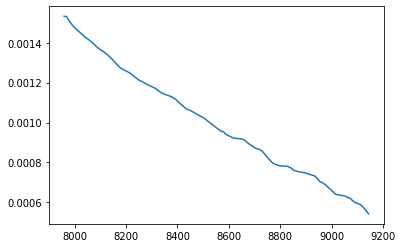

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [10:49<00:00,  4.62it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save(oup_fname, unfiltered_auto)

5.2781647899643326e-11 5.2781647899643326e-11


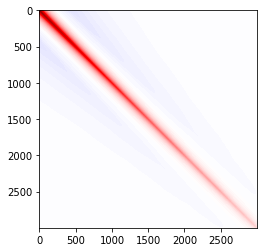

5.2813466084072454e-11 5.2813466084072454e-11


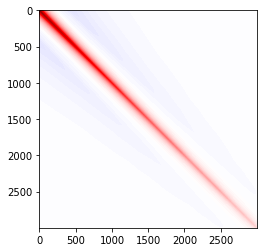

5.2847839285869914e-11 5.2847839285869914e-11


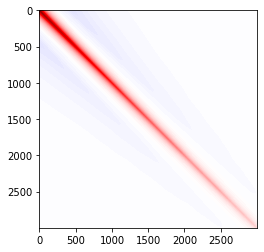

5.2884903813397776e-11 5.2884903813397776e-11


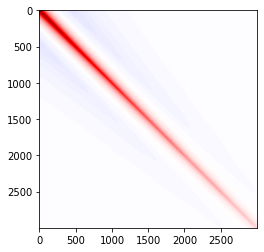

5.29247900401717e-11 5.29247900401717e-11


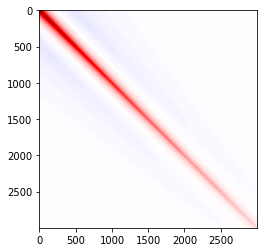

5.296761913692564e-11 5.296761913692564e-11


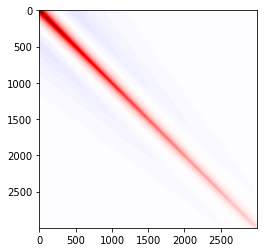

5.30134989838159e-11 5.30134989838159e-11


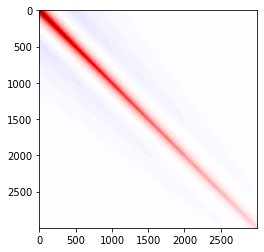

5.3062519077264895e-11 5.3062519077264895e-11


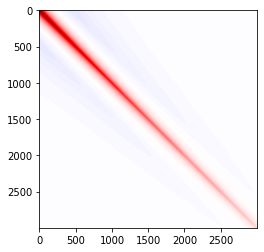

5.311474401778017e-11 5.311474401778017e-11


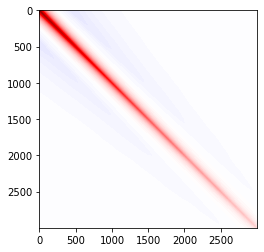

5.317020754353592e-11 5.317020754353592e-11


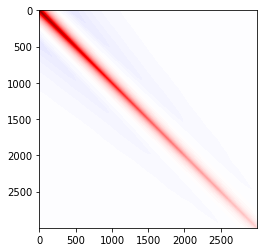

5.322890580994501e-11 5.322890580994501e-11


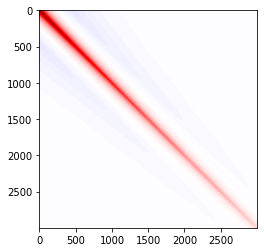

5.329078875096114e-11 5.329078875096114e-11


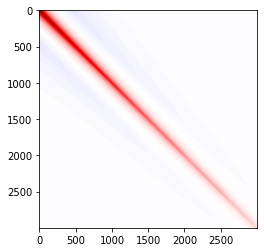

5.335574983125278e-11 5.335574983125278e-11


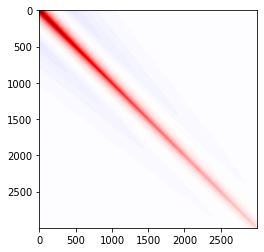

5.3423613078385935e-11 5.3423613078385935e-11


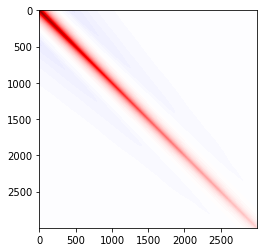

5.3494121400361893e-11 5.3494121400361893e-11


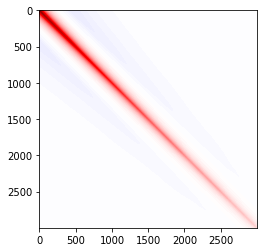

5.356692302738989e-11 5.356692302738989e-11


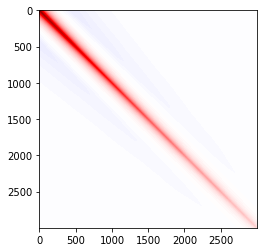

5.3641555149526216e-11 5.3641555149526216e-11


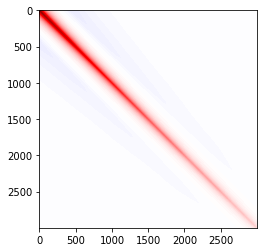

5.371742672727142e-11 5.371742672727142e-11


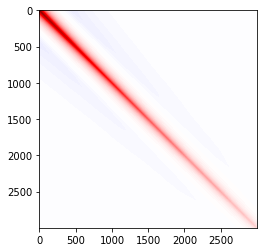

5.379379916987551e-11 5.379379916987551e-11


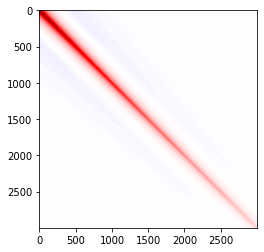

5.3869765683046424e-11 5.3869765683046424e-11


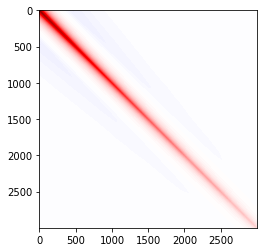

5.3944229555008795e-11 5.3944229555008795e-11


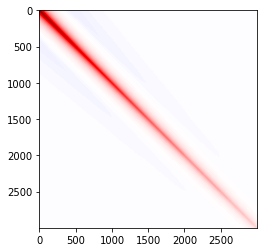

5.40158805290119e-11 5.40158805290119e-11


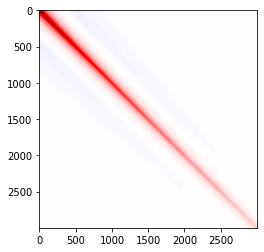

5.4083170409972674e-11 5.4083170409972674e-11


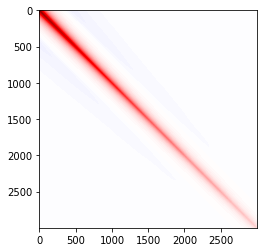

5.414428927733394e-11 5.414428927733394e-11


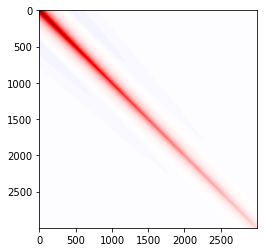

5.4197140061458215e-11 5.4197140061458215e-11


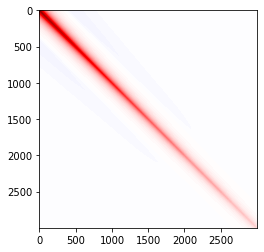

5.423931606628475e-11 5.423931606628475e-11


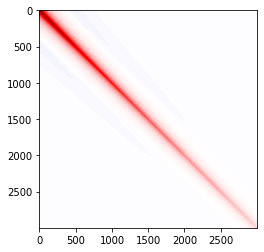

5.426808031467234e-11 5.426808031467234e-11


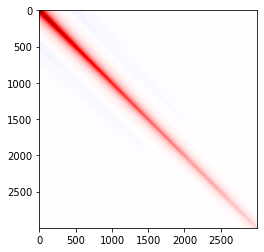

5.428034909453722e-11 5.428034909453722e-11


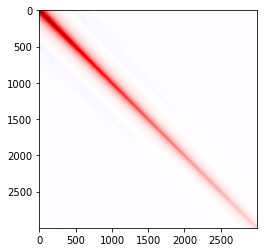

5.427268130598374e-11 5.427268130598374e-11


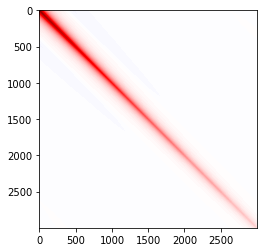

5.4241277963836813e-11 5.4241277963836813e-11


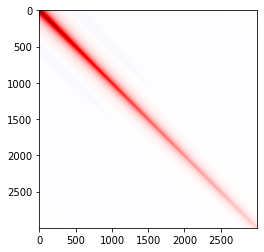

5.4181992304701924e-11 5.4181992304701924e-11


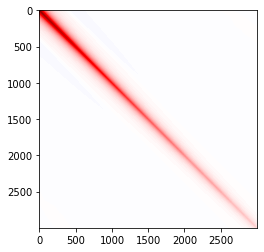

5.409035729242259e-11 5.409035729242259e-11


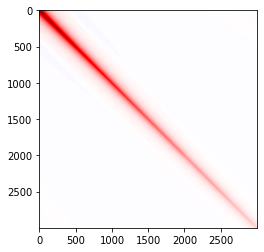

5.39616312729842e-11 5.39616312729842e-11


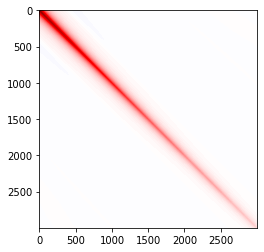

5.379087238558763e-11 5.379087238558763e-11


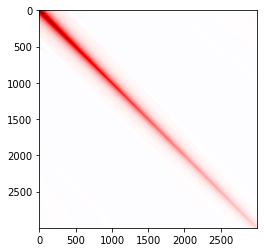

5.357304024212164e-11 5.357304024212164e-11


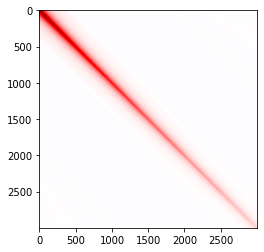

5.330313320156368e-11 5.330313320156368e-11


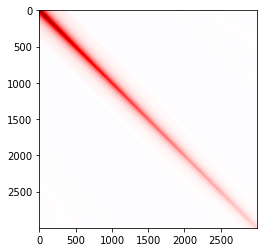

5.297636756266486e-11 5.297636756266486e-11


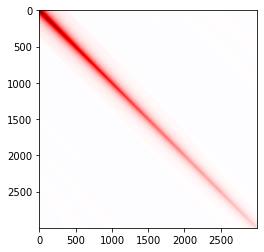

5.258839497201233e-11 5.258839497201233e-11


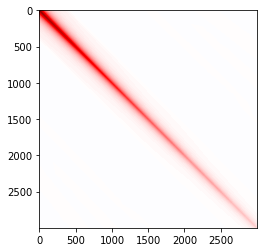

5.213556462530522e-11 5.213556462530522e-11


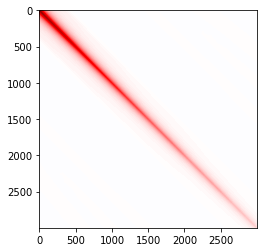

5.1615215946410053e-11 5.1615215946410053e-11


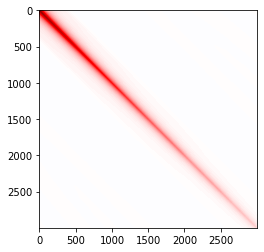

5.1026003218984497e-11 5.1026003218984497e-11


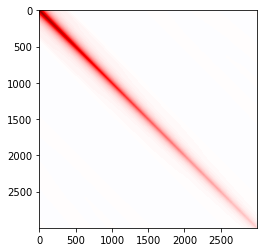

5.036821667750391e-11 5.036821667750391e-11


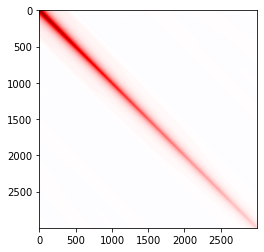

4.96440833077037e-11 4.96440833077037e-11


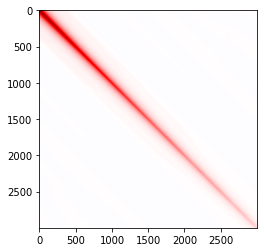

4.8857995636862845e-11 4.8857995636862845e-11


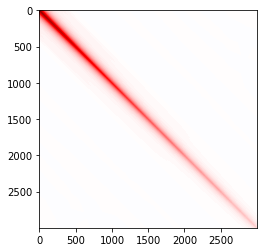

4.801661419657634e-11 4.801661419657634e-11


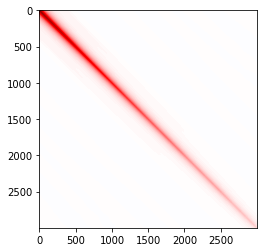

4.712877441474011e-11 4.712877441474011e-11


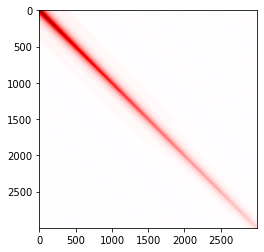

4.620510651187272e-11 4.620510651187272e-11


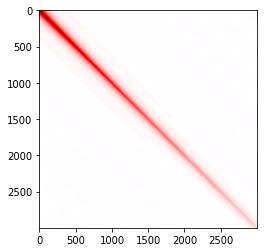

4.5257242151543926e-11 4.5257242151543926e-11


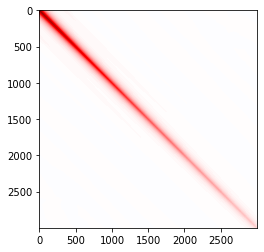

4.429581765069756e-11 4.429581765069756e-11


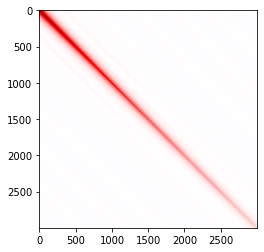

4.333389147775361e-11 4.333389147775361e-11


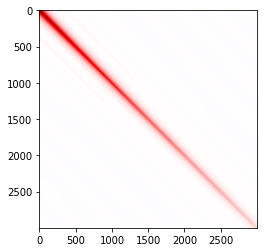

4.238249329881957e-11 4.238249329881957e-11


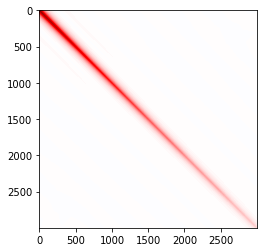

4.1445171521714704e-11 4.1445171521714704e-11


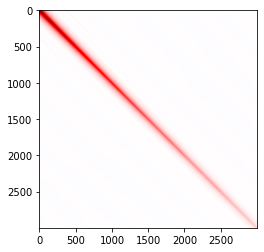

4.05178115513017e-11 4.05178115513017e-11


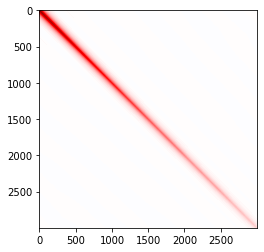

3.958904266767297e-11 3.958904266767297e-11


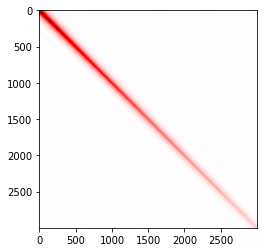

3.8642479142303375e-11 3.8642479142303375e-11


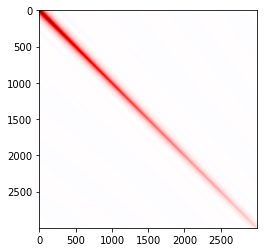

3.766116895596053e-11 3.766116895596053e-11


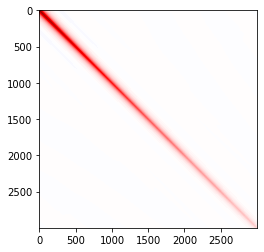

3.661055629573156e-11 3.661055629573156e-11


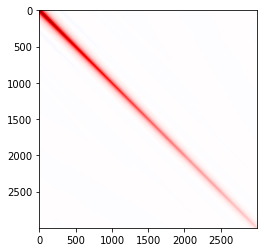

3.546097693975045e-11 3.546097693975045e-11


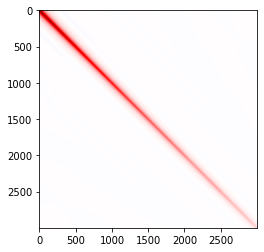

3.41998428347281e-11 3.41998428347281e-11


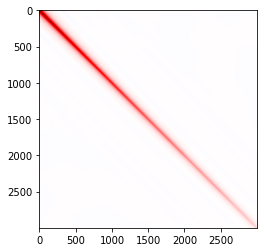

3.283249142093723e-11 3.283249142093723e-11


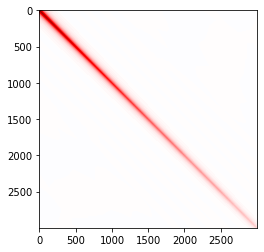

3.139268870969278e-11 3.139268870969278e-11


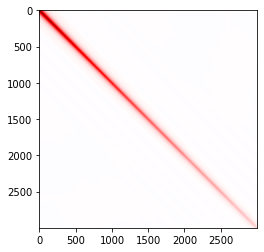

2.993798881441793e-11 2.993798881441793e-11


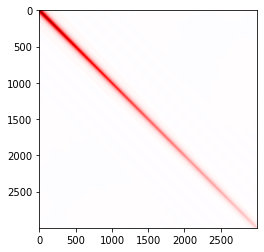

2.8535582590658283e-11 2.8535582590658283e-11


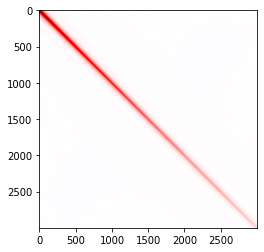

2.7244735837251444e-11 2.7244735837251444e-11


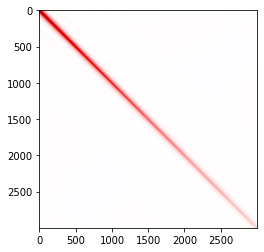

2.6094477968406422e-11 2.6094477968406422e-11


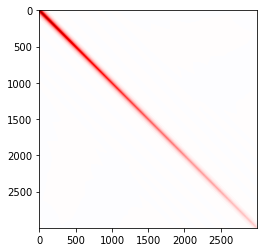

2.506211860211283e-11 2.506211860211283e-11


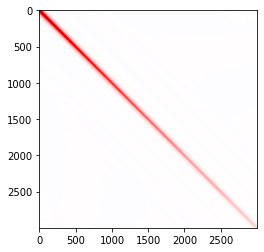

2.4075293838464664e-11 2.4075293838464664e-11


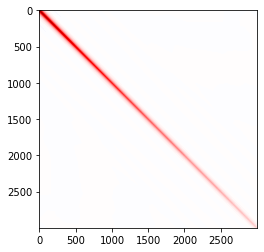

2.30396900952199e-11 2.30396900952199e-11


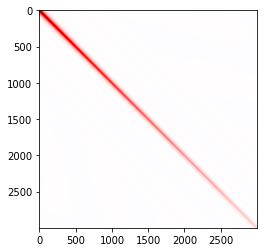

2.1883983478692097e-11 2.1883983478692097e-11


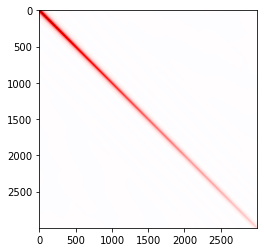

2.0628002542921783e-11 2.0628002542921783e-11


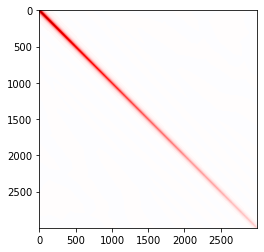

1.9386870212112412e-11 1.9386870212112412e-11


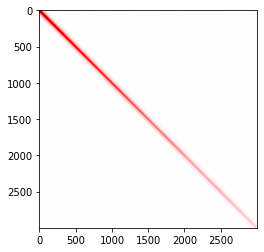

1.8277397204574235e-11 1.8277397204574235e-11


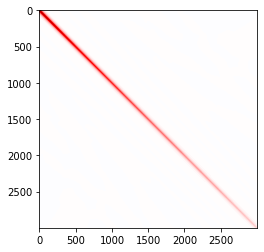

1.7337528623572867e-11 1.7337528623572867e-11


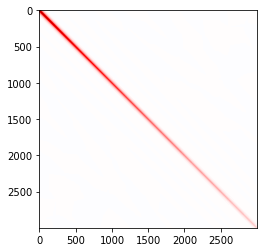

1.6476651370426348e-11 1.6476651370426348e-11


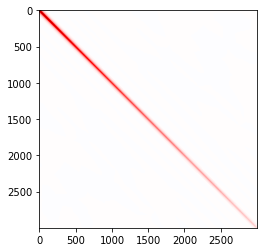

1.556493393552249e-11 1.556493393552249e-11


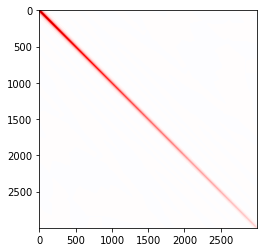

1.4575054416068036e-11 1.4575054416068036e-11


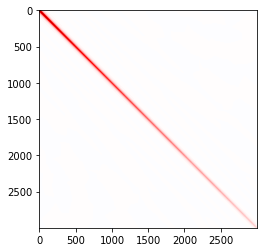

1.3618976542645464e-11 1.3618976542645464e-11


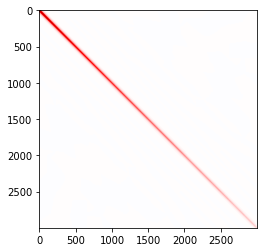

1.2796428618596348e-11 1.2796428618596348e-11


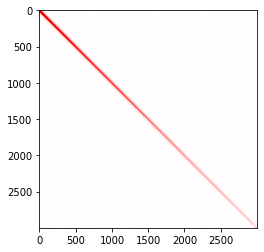

1.2052754369648444e-11 1.2052754369648444e-11


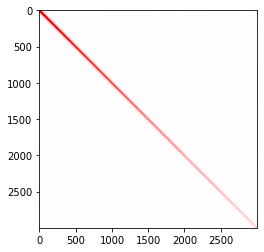

1.1280833070112381e-11 1.1280833070112381e-11


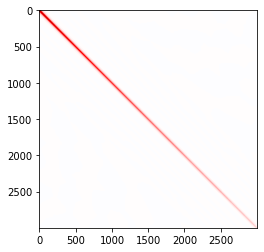

1.0506475359232979e-11 1.0506475359232979e-11


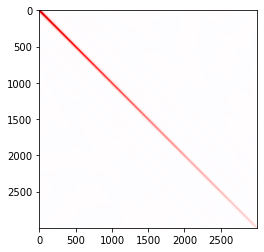

9.816726126374032e-12 9.816726126374032e-12


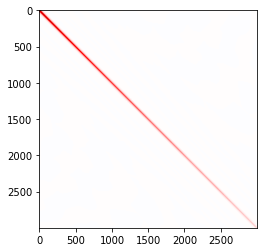

9.179230568588433e-12 9.179230568588433e-12


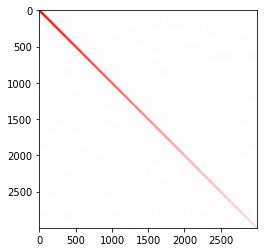

8.5398836926571e-12 8.5398836926571e-12


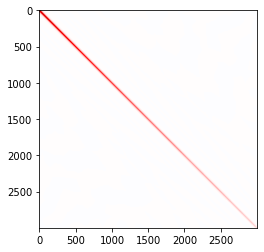

7.943250722652066e-12 7.943250722652066e-12


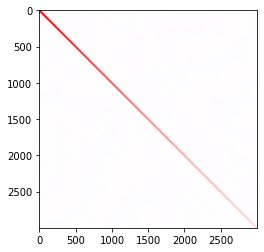

7.39438945897578e-12 7.39438945897578e-12


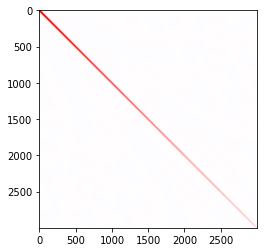

6.8622690823485e-12 6.8622690823485e-12


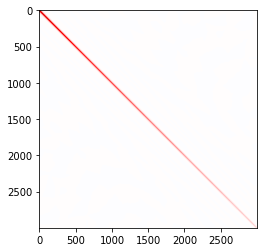

6.367869266771945e-12 6.367869266771945e-12


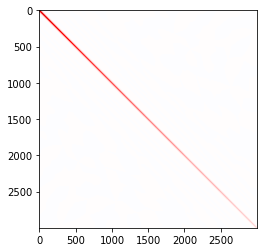

5.903402179688244e-12 5.903402179688244e-12


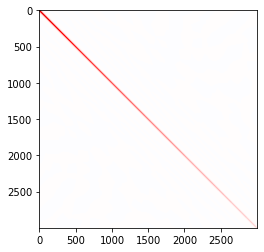

5.4655286353436985e-12 5.4655286353436985e-12


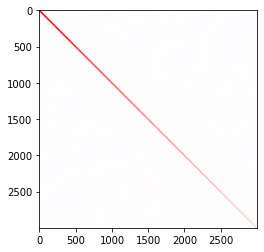

5.05735553626467e-12 5.05735553626467e-12


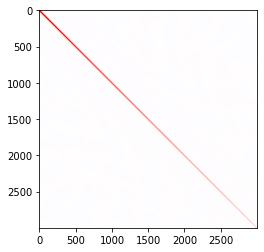

4.674092299643924e-12 4.674092299643924e-12


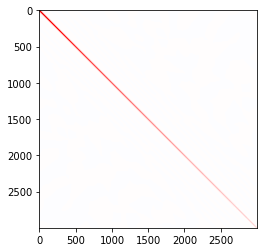

4.316744669520704e-12 4.316744669520704e-12


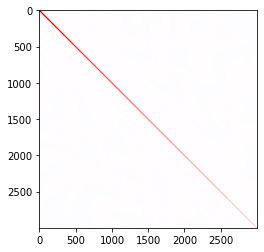

3.982964083748458e-12 3.982964083748458e-12


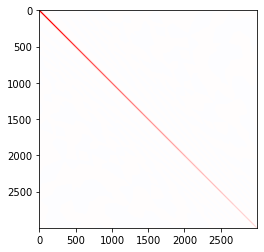

3.672088187961239e-12 3.672088187961239e-12


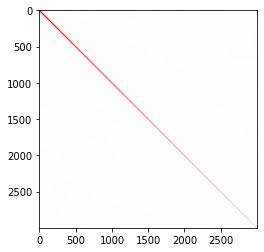

3.3824754244329573e-12 3.3824754244329573e-12


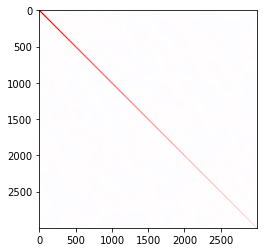

3.1131643179093518e-12 3.1131643179093518e-12


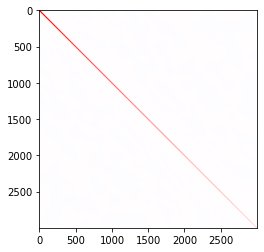

2.8631184660361385e-12 2.8631184660361385e-12


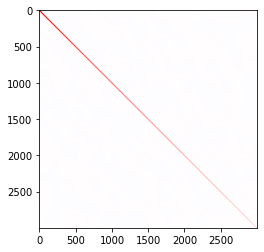

2.631216830943445e-12 2.631216830943445e-12


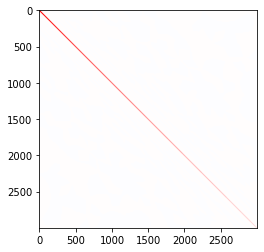

2.416328460219445e-12 2.416328460219445e-12


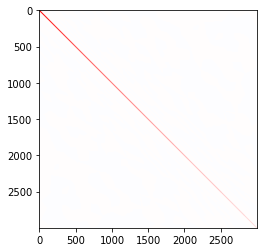

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()